# StackGP.setModelQuality
```{python}
StackGP.setModelQuality(model, inputData, response, modelingObjectives)
```

`setModelQuality` is a StackGP function that computes the fitness objectives for the model and updates the model inplace. 

The function expects 3 arguments: _model_, _inputData_, and _response_

The required arguments are described below: 

* **model**: A StackGP model. 
* **inputData**: A numpy array containing data to evaluate the model at. 
* **response**: A numpy array containing the ground truth response vector. 

The function has 1 optional argument: 

* **modelingObjectives**: A list of objectives to evaluate the model. If none is supplied, the default of [`fitness`, `stackGPModelComplexity`] will be used. 


---

First we need to load in the necessary packages

In [1]:
import StackGP as sgp
import numpy as np

## Overview

### Computing setting model quality for a random model

Here we generate a random model with up to 4 variables, the default operator set, the default constant set, and a maxSize of 10. 

In [29]:
randomModel=sgp.generateRandomModel(4, sgp.defaultOps(), sgp.defaultConst(), 10)

We can display the random model below

In [30]:
sgp.printGPModel(randomModel)

x0*x2 - x3

Now we can generate some random data to use to evaluate the model. Since the data is random, it isn't really a measure of model quality, rather just how similar the model response is to the random data. 

In [40]:
randomInput=np.random.rand(100, 4)
randomResponse=np.random.rand(100)
sgp.setModelQuality(randomModel, randomInput, randomResponse)
print("Model's fitness vector: ",randomModel[-1])

Model's fitness vector:  [1, 9]


---
---

## Examples

This section provides some interesting examples to demonstrate how `setModelQuality` can be used. 

---

### Evaluating Best Model on Test Set
Once we train a model set, we are likely interested in the quality of the best model on the test set. 

Lets start by generating a training and test set with 4 features. 

In [41]:
trainInputData = np.random.rand(4, 100)
randomModel = sgp.generateRandomModel(4, sgp.defaultOps(), sgp.defaultConst(), 10)
display(sgp.printGPModel(randomModel))
trainResponse = sgp.evaluateGPModel(randomModel, trainInputData)

8.69462703152357e-5 - x2

Now lets evolve a model population using the training data. 

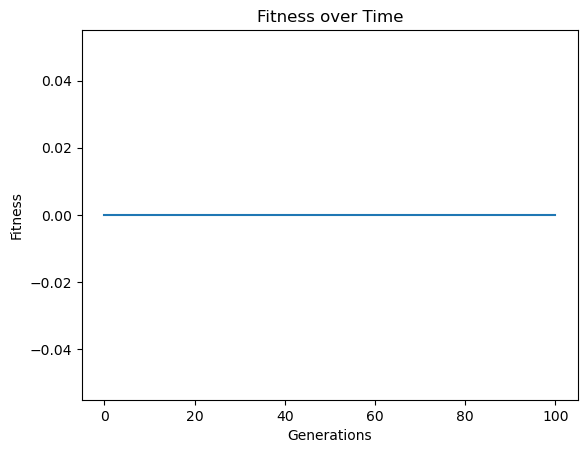

In [42]:
models=sgp.evolve(trainInputData, trainResponse, tracking=True)

Now lets pick the best model evolved from the population. 

In [43]:
bestModel = models[0]
sgp.printGPModel(bestModel)

8.69462703151445e-5 - 1.0*x2

Now lets generate a test set. 

In [45]:
testInputData = np.random.rand(4, 100)
testResponse = sgp.evaluateGPModel(randomModel, testInputData)

Now we can update the model fitness vector of the best model to determine performance on the test set. 

In [49]:
sgp.setModelQuality(bestModel, testInputData, testResponse)
print("Best model's test fitness vector: ", bestModel[-1])

Best model's test fitness vector:  [1.3322676295501878e-15, 5]


### Updating Model Population on Test Set

We may be interested in updating the fitness vector for the whole population using a test set. 

Lets start off by generating a random model which we will use to generate the training set. 

In [50]:
randomModel=sgp.generateRandomModel(4, sgp.defaultOps(), sgp.defaultConst(), 20)
sgp.printGPModel(randomModel)

exp(x1 + x2 - exp(x3)) + 0.318309886183791/x1

Now we can generate some data and use the above random model to generate the response from the random input data. 

In [51]:
inputData = np.random.rand(4, 100)
response = sgp.evaluateGPModel(randomModel, inputData)

Now we can evolve models to fit the generated training data. 

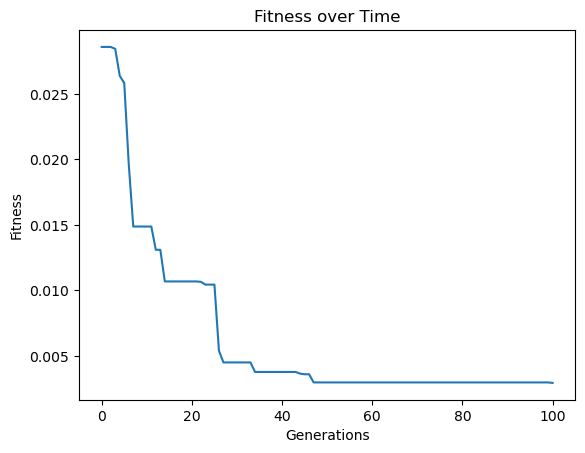

In [58]:
models = sgp.evolve(inputData,response, tracking=True)

Lets first look at the Pareto front plot with respect to the training data. 

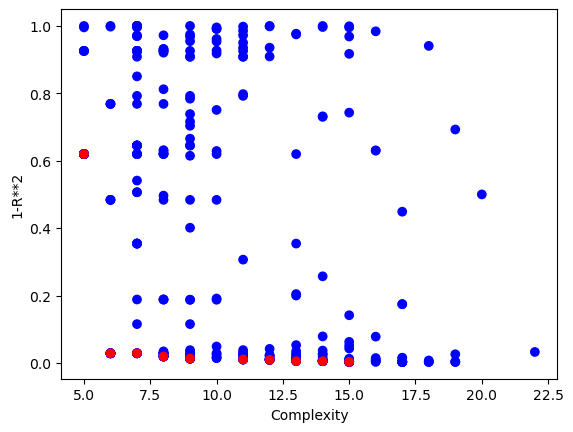

In [59]:
sgp.plotModels(models)

We can also view the model accuracy distribution plot with respect to the training data. 

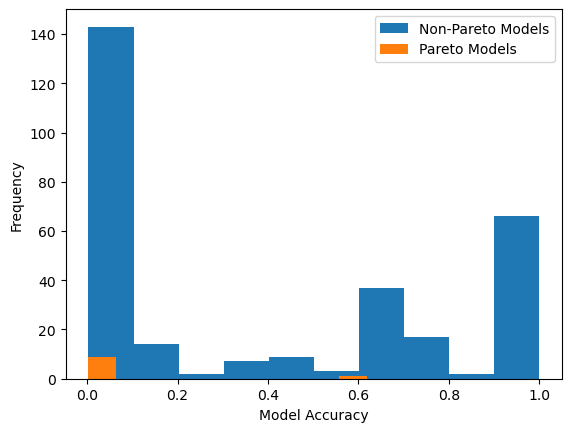

In [60]:
sgp.plotModelAccuracyDistribution(models)

Now lets generate some test data. 

In [61]:
testInputData = np.random.rand(4, 100)
testResponse = sgp.evaluateGPModel(randomModel, testInputData)

Now we can update the model quality using the test data. 

In [62]:
for model in models: 
    sgp.setModelQuality(model, testInputData, testResponse)

Now we can view the Pareto front plot with respect to the test data. 

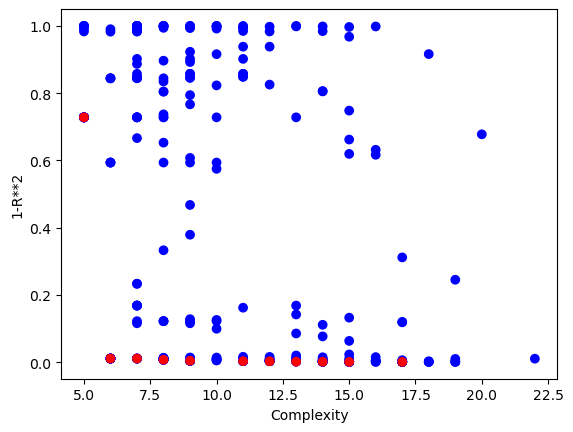

In [63]:
sgp.plotModels(models)

We can also view the model accuracy distribution plot with respect to the test data. 

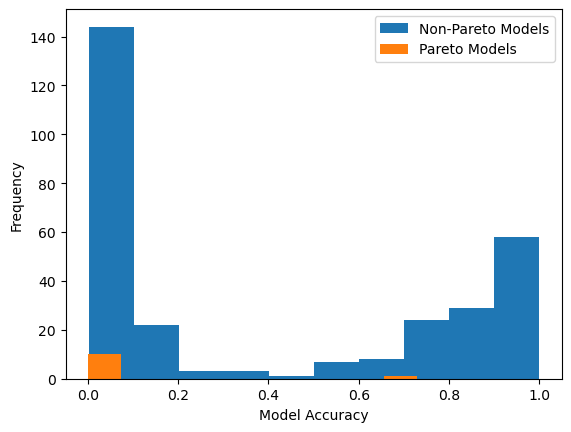

In [64]:
sgp.plotModelAccuracyDistribution(models)

### Evaluating on a Different Set of Objectives

There may be cases where we want to train using one set of objectives and then do analysis using another set of objectives. In this case, we will train using the default set of objectives and then evaluate the models on the test set using `RMSE`. 

First lets generate random input data and a random model to generate the target response data. 

In [74]:
inputData = np.random.rand(100, 8)
randomModel = sgp.generateRandomModel(8, sgp.defaultOps(), sgp.defaultConst(), 20)
display(sgp.printGPModel(randomModel))
response = sgp.evaluateGPModel(randomModel, inputData)


x4*(2.71828182845905*x1 - x3)*sqrt(exp(x1))

Now lets train a model population using the generated training data. To make it interesting, lets set the generation count to 200, the elitism rate to 10% and the tournament size to 30. 

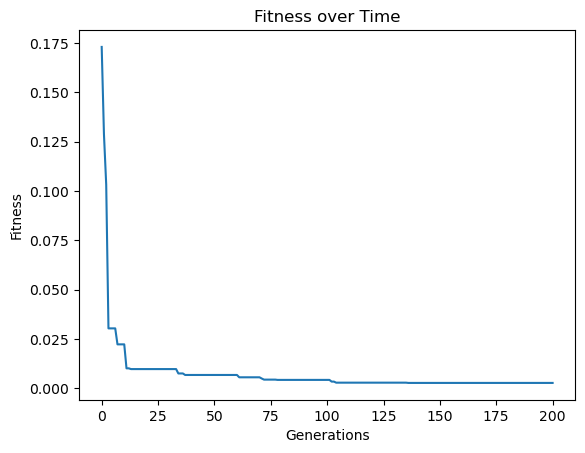

In [75]:
models=sgp.evolve(inputData, response, tracking=True, generations=200, elitismRate=10, tourneySize=30)

Now lets view the accuracy distribution plot with respect to the training data and original fitness objectives. 

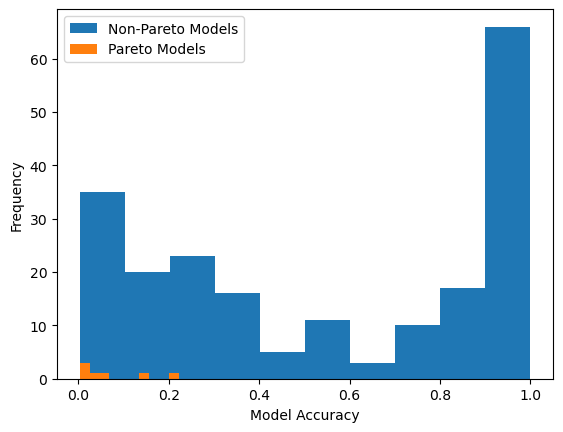

In [76]:
sgp.plotModelAccuracyDistribution(models)

Now lets generate some test data. 

In [77]:
testInputData = np.random.rand(100, 8)
testResponse = sgp.evaluateGPModel(randomModel, testInputData)

Now rather than just updated the model quality using the test data, lets change the evaluation objective to be `rmse`. 

In [78]:
for model in models:
    sgp.setModelQuality(model, testInputData, testResponse, modelEvaluationMetrics=[sgp.rmse])

Now lets visualize the model accuracy distribution plot. In this case we will see the plot with respect to `rmse` rather than `fitness`. 

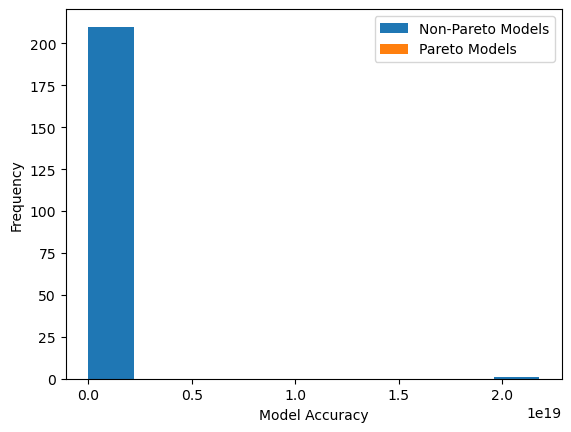

In [79]:
sgp.plotModelAccuracyDistribution(models)

That plot may not have been very informative so it may be useful to filter out models with very large errors. Here we select the models with the 100 best accuracies and then display the accuracy distribution plot again. 

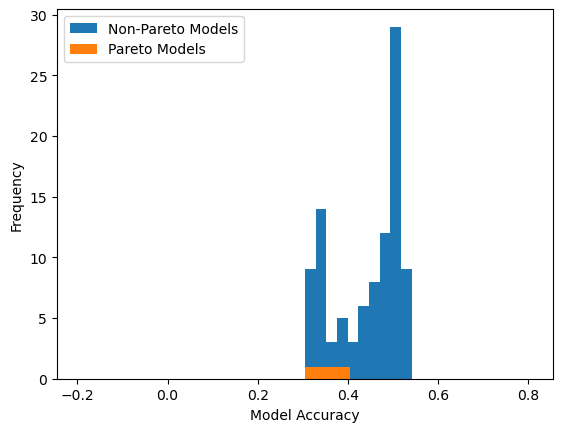

In [83]:
qualityModels = sgp.selectModels(models, selectionSize=100)
sgp.plotModelAccuracyDistribution(qualityModels)